In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv/train.csv')

In [3]:
data.shape

(42000, 785)

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels = data.label

In [6]:
train_features = data.drop('label',axis=1)

In [7]:
train_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_features = train_features.values

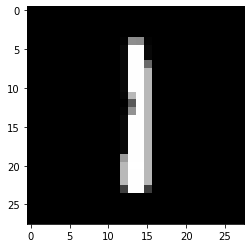

In [9]:
single_image = train_features[2,:].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [10]:
train_labels = train_labels.values

In [11]:
train_labels[2]

1

In [12]:
len(data)

42000

In [13]:
tsne = manifold.TSNE(n_components=3,random_state=42)
transformed_data =tsne.fit_transform(train_features[:5000,:])

In [14]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,train_labels[:5000])),columns=["x","y","z","targets"])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [15]:
tsne_df['targets'][0]

1

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_labels[:5000],tsne_df['targets'])

array([[494,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 558,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 545,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 480,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 477,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 469,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 516,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 506,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 477,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 478]], dtype=int64)

In [17]:
tsne_df.to_csv('final_dataset.csv',index=False)

In [18]:
final_dataset = pd.read_csv('final_dataset.csv')

In [19]:
final_dataset.head()

,x,y,z,targets
0,17.390631,9.088684,5.201672,1
1,-18.864847,9.202252,9.252913,0
2,12.118325,1.319292,-13.281645,1
3,-8.830659,-19.693413,2.144708,4
4,-18.884808,9.478520,10.307687,0
